<a href="https://colab.research.google.com/github/Tatianakami/projeto-churn-pyspark/blob/main/projeto_churn_pyspark_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master('local[*]').appName("Classificação com Spark").getOrCreate()

In [ ]:
spark = SparkSession.builder.master('local[*]').appName("Classificação com Spark").getOrCreate()
spark

In [ ]:
# 1.3 Carregamento dos Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#  você lê o arquivo
# dataset = spark.read.csv("/content/drive/MyDrive/SuaPasta/dados_clientes.csv", sep=',', inferSchema=True, header=True)

Mounted at /content/drive


In [ ]:
# 1.4 Transformando os Dados

In [ ]:
%who

LogisticRegression	 SparkSession	 colunasBinarias	 drive	 f	 remover_colunas_duplicadas	 spark	 


In [ ]:
import os

# Verificando se o arquivo realmente chegou
if os.path.exists('/content/dados_clientes.csv'):
    dados = spark.read.csv('/content/dados_clientes.csv', sep=',', inferSchema=True, header=True)
    print("✅ Sucesso! O arquivo foi encontrado e lido.")
    dados.show(5)
else:
    print("❌ O arquivo ainda não está na pastinha lateral. Tente arrastar novamente!")

❌ O arquivo ainda não está na pastinha lateral. Tente arrastar novamente!


In [ ]:
import os
lista_arquivos = os.listdir('/content/')
print(f"Arquivos que o Colab está vendo agora: {lista_arquivos}")

Arquivos que o Colab está vendo agora: ['.config', 'drive', 'sample_data']


In [ ]:
# 1. Cria a SparkSession (se ela não estiver na memória)
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ChurnAlura").getOrCreate()

# 2. Tenta ler o arquivo (O caminho tem que ser exato!)
try:
    dados = spark.read.csv('/content/drive/MyDrive/Modelos_classificaco_alura_modulo2/base de dados (1)/base de dados', sep=',', inferSchema=True, header=True)
    print("✅ Sucesso! Agora a variável 'dados' existe.")
    # 3. Agora sim o comando que você queria
    dados.groupBy('Churn').count().show()
except Exception as e:
    print("❌ O arquivo ainda não foi encontrado na pastinha. Arraste o arquivo CSV para o canto esquerdo do Colab e espere ele carregar!")

✅ Sucesso! Agora a variável 'dados' existe.
+-----+-----+
|Churn|count|
+-----+-----+
|  Sim| 5174|
|  Nao| 5174|
+-----+-----+



In [ ]:
dados.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Churn: string (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- Conjuge: string (nullable = true)
 |-- Dependentes: string (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- TelefoneFixo: string (nullable = true)
 |-- MaisDeUmaLinhaTelefonica: string (nullable = true)
 |-- Internet: string (nullable = true)
 |-- SegurancaOnline: string (nullable = true)
 |-- BackupOnline: string (nullable = true)
 |-- SeguroDispositivo: string (nullable = true)
 |-- SuporteTecnico: string (nullable = true)
 |-- TVaCabo: string (nullable = true)
 |-- StreamingFilmes: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- ContaCorreio: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)



In [ ]:
colunasBinarias = [
    'Churn',
    'Conjuge',
    'Dependentes',
    'TelefoneFixo',
    'MaisDeUmaLinhaTelefonica',
    'SegurancaOnline',
    'BackupOnline',
    'SeguroDispositivo',
    'SuporteTecnico',
    'TVaCabo',
    'StreamingFilmes',
    'ContaCorreio'
]

In [ ]:
from pyspark.sql import functions as f

In [ ]:
todasColunas = [f.when(f.col(c)=='Sim', 1).otherwise(0).alias(c) for c in colunasBinarias]

In [ ]:
for coluna in reversed(dados.columns):
  if coluna not in colunasBinarias:
    todasColunas.insert(0, coluna)
todasColunas

['id',
 'Mais65anos',
 'MesesDeContrato',
 'Internet',
 'TipoContrato',
 'MetodoPagamento',
 'MesesCobrados',
 Column<'CASE WHEN =(Churn, 'Sim') THEN 1 ELSE 0 END AS Churn'>,
 Column<'CASE WHEN =(Conjuge, 'Sim') THEN 1 ELSE 0 END AS Conjuge'>,
 Column<'CASE WHEN =(Dependentes, 'Sim') THEN 1 ELSE 0 END AS Dependentes'>,
 Column<'CASE WHEN =(TelefoneFixo, 'Sim') THEN 1 ELSE 0 END AS TelefoneFixo'>,
 Column<'CASE WHEN =(MaisDeUmaLinhaTelefonica, 'Sim') THEN 1 ELSE 0 END AS MaisDeUmaLinhaTelefonica'>,
 Column<'CASE WHEN =(SegurancaOnline, 'Sim') THEN 1 ELSE 0 END AS SegurancaOnline'>,
 Column<'CASE WHEN =(BackupOnline, 'Sim') THEN 1 ELSE 0 END AS BackupOnline'>,
 Column<'CASE WHEN =(SeguroDispositivo, 'Sim') THEN 1 ELSE 0 END AS SeguroDispositivo'>,
 Column<'CASE WHEN =(SuporteTecnico, 'Sim') THEN 1 ELSE 0 END AS SuporteTecnico'>,
 Column<'CASE WHEN =(TVaCabo, 'Sim') THEN 1 ELSE 0 END AS TVaCabo'>,
 Column<'CASE WHEN =(StreamingFilmes, 'Sim') THEN 1 ELSE 0 END AS StreamingFilmes'>,
 Column

In [ ]:
dados.select(todasColunas).show()

+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|
+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
|    0|      1|          0|           0|                       0|              0|           1|                0|             0|      0|              0|           1|
|    0|      0|          0|           1|                       0|              1|           0|                1|             0|      0|              0|           0|
|    1|      0|          0|           1|                       0|              1|           1|                0|             0|      0|              0|           1|
|    0|   

In [ ]:
dataset = dados.select(todasColunas)

In [ ]:
dataset.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- Internet: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)
 |-- Churn: integer (nullable = false)
 |-- Conjuge: integer (nullable = false)
 |-- Dependentes: integer (nullable = false)
 |-- TelefoneFixo: integer (nullable = false)
 |-- MaisDeUmaLinhaTelefonica: integer (nullable = false)
 |-- SegurancaOnline: integer (nullable = false)
 |-- BackupOnline: integer (nullable = false)
 |-- SeguroDispositivo: integer (nullable = false)
 |-- SuporteTecnico: integer (nullable = false)
 |-- TVaCabo: integer (nullable = false)
 |-- StreamingFilmes: integer (nullable = false)
 |-- ContaCorreio: integer (nullable = false)



In [ ]:
dados.select(['Internet', 'TipoContrato', 'MetodoPagamento']).show()

+-----------+------------+----------------+
|   Internet|TipoContrato| MetodoPagamento|
+-----------+------------+----------------+
|        DSL| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|          Boleto|
|        DSL| Mensalmente|          Boleto|
|        DSL|       UmAno|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|   CartaoCredito|
|        DSL| Mensalmente|          Boleto|
|FibraOptica| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|   DebitoEmConta|
|        DSL| Mensalmente|          Boleto|
|        Nao|    DoisAnos|   CartaoCredito|
|FibraOptica|       UmAno|   CartaoCredito|
|FibraOptica| Mensalmente|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica|    DoisAnos|   CartaoCredito|
|        Nao|       UmAno|          Boleto|
|FibraOptica|    DoisAnos|   DebitoEmConta|
|        DSL| Mensalmente|   CartaoCredito|
|FibraOptica| Mensalmente|Boleto

In [ ]:
# Agrupar pelo ID do cliente
# Pivot apenas a coluna 'internet'
dataset.groupBy('id') \
    .pivot('internet') \
    .agg(f.lit(1)) \
    .na.fill(0) \
    .show()

+----+---+-----------+---+
|  id|DSL|FibraOptica|Nao|
+----+---+-----------+---+
|7982|  1|          0|  0|
|9465|  0|          1|  0|
|2122|  1|          0|  0|
|3997|  1|          0|  0|
|6654|  0|          1|  0|
|7880|  0|          1|  0|
|4519|  0|          1|  0|
|6466|  0|          1|  0|
| 496|  1|          0|  0|
|7833|  0|          1|  0|
|1591|  0|          0|  1|
|2866|  0|          1|  0|
|8592|  0|          1|  0|
|1829|  0|          1|  0|
| 463|  0|          1|  0|
|4900|  0|          1|  0|
|4818|  0|          1|  0|
|7554|  1|          0|  0|
|1342|  0|          0|  1|
|5300|  0|          1|  0|
+----+---+-----------+---+
only showing top 20 rows


In [ ]:
Internet = dataset.groupBy('id').pivot('Internet').agg(f.lit(1)).na.fill(0)
TipoContrato = dataset.groupBy('id').pivot('TipoContrato').agg(f.lit(1)).na.fill(0)
MetodoPagamento = dataset.groupBy('id').pivot('MetodoPagamento').agg(f.lit(1)).na.fill(0)


In [ ]:
Unindo com o dataset

In [ ]:
from pyspark.sql import functions as f

# Criando o dataset final com a técnica de Seleção e Alias
dataset_final = dataset\
    .join(Internet, 'id', how='inner')\
    .join(TipoContrato, 'id', how='inner')\
    .join(MetodoPagamento, 'id', how='inner')\
    .select(
        '*', # Mantém as colunas originais do dataset
        f.col('DSL').alias('Internet_DSL'),
        f.col('FibraOptica').alias('Internet_FibraOptica'),
        f.col('Nao').alias('Internet_Nao'),
        f.col('DoisAnos').alias('TipoContrato_DoisAnos'),
        f.col('Mensalmente').alias('TipoContrato_Mensalmente'),
        f.col('UmAno').alias('TipoContrato_UmAno'),
        f.col('Boleto').alias('MetodoPagamento_Boleto'),
        f.col('BoletoEletronico').alias('MetodoPagamento_BoletoEletronico'),
        f.col('CartaoCredito').alias('MetodoPagamento_CartaoCredito'),
        f.col('DebitoEmConta').alias('MetodoPagamento_DebitoEmConta')
    )\
    .drop('Internet', 'TipoContrato', 'MetodoPagamento') # Remove as colunas de texto antigas


dataset_final.show(5)


+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+---+-----------+---+--------+-----------+-----+------+----------------+-------------+-------------+------------+--------------------+------------+---------------------+------------------------+------------------+----------------------+--------------------------------+-----------------------------+-----------------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|DSL|FibraOptica|Nao|DoisAnos|Mensalmente|UmAno|Boleto|BoletoEletronico|CartaoCredito|DebitoEmConta|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_DoisAnos|TipoContrato_Mensalmente|TipoContrato_UmAno|MetodoPagamento_Boleto|MetodoPa

In [ ]:
# 1. Função mágica para remover colunas que têm o mesmo nome
def remover_colunas_duplicadas(df):
    nomes_vistos = set()
    colunas_para_manter = []
    for nome in df.columns:
        if nome not in nomes_vistos:
            colunas_para_manter.append(nome)
            nomes_vistos.add(nome)
    return df.select(*colunas_para_manter)

# 2. Aplicando a limpeza  dataset
dataset_final_limpo = remover_colunas_duplicadas(dataset_final)

from pyspark.ml.feature import VectorAssembler

X = [
    'Mais65anos', 'MesesDeContrato', 'MesesCobrados', 'Conjuge', 'Dependentes',
    'TelefoneFixo', 'Internet_DSL', 'Internet_FibraOptica', 'TipoContrato_Mensalmente',
    'MetodoPagamento_BoletoEletronico'
]

assembler = VectorAssembler(inputCols=X, outputCol='features')

dataset_preparado = assembler.transform(dataset_final_limpo).select('features', 'Churn')
dataset_preparado = dataset_preparado.withColumnRenamed('Churn', 'label')

print("Sucesso! Dataset preparado sem ambiguidades.")

Sucesso! Dataset preparado sem ambiguidades.


In [ ]:
from pyspark.ml.classification import LogisticRegression

# 1. Dividindo em Treino e Teste (70% estuda, 30% faz a prova)
treino, teste = dataset_preparado.randomSplit([0.7, 0.3], seed=101)

# 2. Configurando o "Cérebro"
lr = LogisticRegression(labelCol='label', featuresCol='features')

# 3. TREINANDO (O momento em que ele aprende os padrões)
modelo_lr = lr.fit(treino)

# 4. PREVENDO (Hora de testar nos 30% que ele não viu)
previsoes_lr = modelo_lr.transform(teste)

previsoes_lr.select('label', 'prediction', 'probability').show(5)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.96345315835339...|
|    0|       0.0|[0.96161985056883...|
|    0|       0.0|[0.98341450126206...|
|    0|       0.0|[0.98423758393472...|
|    0|       0.0|[0.82654577852727...|
+-----+----------+--------------------+
only showing top 5 rows


In [ ]:
dataset = dataset.withColumnRenamed('Churn', 'label')

In [ ]:
X = dataset.columns
X.remove('label')
X.remove('id')

In [ ]:
from google.colab import drive
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler

# 1. Conectar ao Drive
drive.mount('/content/drive')

# 2. Iniciar o Spark
spark = SparkSession.builder.appName("ProjetoChurn").getOrCreate()

# 3. O CAMINHO
caminho_arquivo = "/content/drive/MyDrive/Modelos_classificaco_alura_modulo2/base de dados (1)/base de dados/dados_clientes.csv"

# 4. LER OS DADOS
dados = spark.read.csv(caminho_arquivo, sep=',', inferSchema=True, header=True)

# 5. TRANSFORMAR TEXTO EM NÚMERO (Resolvendo o erro de String)
colunas_categoricas = ['Churn', 'Conjuge', 'Dependentes', 'TelefoneFixo', 'MaisDeUmaLinhaTelefonica',
                      'SegurancaOnline', 'BackupOnline', 'SeguroDispositivo', 'SuporteTecnico',
                      'TVaCabo', 'StreamingFilmes', 'ContaCorreio', 'Internet', 'TipoContrato', 'MetodoPagamento']

dataset_processado = dados
for coluna in colunas_categoricas:
    indexer = StringIndexer(inputCol=coluna, outputCol=coluna + "_idx")
    dataset_processado = indexer.fit(dataset_processado).transform(dataset_processado)
    dataset_processado = dataset_processado.drop(coluna).withColumnRenamed(coluna + "_idx", coluna)

# 6. CRIAR O VETOR DE FEATURES (O que a IA entende)
#  todas as colunas menos o 'id' e o 'Churn' (que é o resultado)
features = [col for col in dataset_processado.columns if col not in ['id', 'Churn']]

assembler = VectorAssembler(inputCols=features, outputCol="features")

# 7. RESULTADO FINAL (Usando 'Churn' em vez de 'label')
dataset_prep = assembler.transform(dataset_processado).select('features', 'Churn')

print("✅ TUDO PRONTO! Seu dataset está preparado.")
dataset_prep.show(5, truncate=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ TUDO PRONTO! Seu dataset está preparado.
+-----------------------------------------------------------------------+-----+
|features                                                               |Churn|
+-----------------------------------------------------------------------+-----+
|(17,[1,2,3,5,6,8,14],[1.0,29.85,1.0,1.0,2.0,1.0,1.0])                  |0.0  |
|(17,[1,2,7,9,13,14,15,16],[34.0,56.95,1.0,1.0,1.0,1.0,2.0,1.0])        |0.0  |
|(17,[1,2,7,8,14,16],[2.0,53.85,1.0,1.0,1.0,1.0])                       |1.0  |
|[0.0,45.0,42.3,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0]|0.0  |
|(17,[1,2],[2.0,70.7])                                                  |1.0  |
+-----------------------------------------------------------------------+-----+
only showing top 5 rows


In [ ]:
from pyspark.ml.feature import StringIndexer

# Lista das colunas que o erro apontou como "string"
colunas_para_converter = [
    'Churn', 'Conjuge', 'Dependentes', 'TelefoneFixo',
    'MaisDeUmaLinhaTelefonica', 'SegurancaOnline', 'BackupOnline',
    'SeguroDispositivo', 'SuporteTecnico', 'TVaCabo',
    'StreamingFilmes', 'ContaCorreio'
]

# Transformando texto em número (0 e 1)
for coluna in colunas_para_converter:
    indexer = StringIndexer(inputCol=coluna, outputCol=coluna + "_idx")
    dataset_limpo = indexer.fit(dataset_limpo).transform(dataset_limpo)
    # Substituindo a coluna original pela numérica
    dataset_limpo = dataset_limpo.drop(coluna).withColumnRenamed(coluna + "_idx", coluna)

print("✅ Colunas convertidas para numérico!")

✅ Colunas convertidas para numérico!


In [ ]:
# Dividindo: 70% para aprender (treino) e 30% para a prova (teste)
treino, teste = dataset_prep.randomSplit([0.7, 0.3], seed=101)

print(f"Dados para treino: {treino.count()}")
print(f"Dados para teste: {teste.count()}")

Dados para treino: 7206
Dados para teste: 3142


In [ ]:
from pyspark.ml.classification import LogisticRegression

# 1. O Simulado e a Prova Final (70% para treinar, 30% para testar)
#  o seed=101 para que o resultado seja sempre o mesmo
treino, teste = dataset_prep.randomSplit([0.7, 0.3], seed=101)

# 2. Instanciando o "Robô" da Regressão Logística
lr = LogisticRegression(labelCol='Churn', featuresCol='features')

# 3. O Treinamento (A IA estudando os 70% dos dados)
modelo_lr = lr.fit(treino)

# 4. A Previsão (A IA fazendo a prova com os 30% que ela nunca viu)
previsoes_lr = modelo_lr.transform(teste)

# 5.  resultados finais
previsoes_lr.select('Churn', 'prediction', 'probability').show(10)

+-----+----------+--------------------+
|Churn|prediction|         probability|
+-----+----------+--------------------+
|  1.0|       1.0|[0.16105612880350...|
|  1.0|       1.0|[0.16110266578944...|
|  1.0|       1.0|[0.16136859743491...|
|  1.0|       1.0|[0.16143889794378...|
|  0.0|       1.0|[0.16174564187171...|
|  1.0|       1.0|[0.16190525799251...|
|  1.0|       1.0|[0.16230121601541...|
|  1.0|       1.0|[0.16230917056961...|
|  1.0|       1.0|[0.16593010116875...|
|  1.0|       1.0|[0.16645862492520...|
+-----+----------+--------------------+
only showing top 10 rows


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# 1. o "Professor" que vai dar a nota (Avaliador)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# 2.  previsões que a IA fez
acuracia = evaluator.evaluate(previsoes_lr)

# 3. Mostramos a nota final
print(f"Acurácia do Modelo: {acuracia:.2%}")

Acurácia do Modelo: 76.86%


In [ ]:
# 1. Definindo a semente (Para o sorteio ser sempre o mesmo)
SEED = 101

# 2. Separando os dados (70% para estudar, 30% para a prova)
treino, teste = dataset_prep.randomSplit([0.7, 0.3], seed=SEED)

print(f"Dados para Treino: {treino.count()}")
print(f"Dados para Teste: {teste.count()}")

# 3. Criando e Treinando o Robô (Logistic Regression)
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol='Churn', featuresCol='features')
modelo_lr = lr.fit(treino) # Aqui a IA "estuda"

# 4. Fazendo a Previsão (A IA faz a prova)
previsoes_lr_teste = modelo_lr.transform(teste)

# 5. Olhando o resultado
previsoes_lr_teste.show()

Dados para Treino: 7206
Dados para Teste: 3142
+--------------------+-----+--------------------+--------------------+----------+
|            features|Churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(17,[0,1,2],[1.0,...|  1.0|[-1.6503908742454...|[0.16105612880350...|       1.0|
|(17,[0,1,2],[1.0,...|  1.0|[-1.6500464946605...|[0.16110266578944...|       1.0|
|(17,[0,1,2],[1.0,...|  1.0|[-1.6480801071467...|[0.16136859743491...|       1.0|
|(17,[0,1,2],[1.0,...|  1.0|[-1.6475607191092...|[0.16143889794378...|       1.0|
|(17,[0,1,2],[1.0,...|  0.0|[-1.6452965950002...|[0.16174564187171...|       1.0|
|(17,[0,1,2],[1.0,...|  1.0|[-1.6441198144321...|[0.16190525799251...|       1.0|
|(17,[0,1,2],[1.0,...|  1.0|[-1.6412046226609...|[0.16230121601541...|       1.0|
|(17,[0,1,2],[1.0,...|  1.0|[-1.6411461170383...|[0.16230917056961...|       1.0|
|(17,[0,1,2],[1.0,...|  1.0|[-1.6147505880130...|[0

In [ ]:
# 1. Calculando os valores básicos
tp = previsoes_lr_teste.where((f.col('Churn') == 1) & (f.col('prediction') == 1)).count()
tn = previsoes_lr_teste.where((f.col('Churn') == 0) & (f.col('prediction') == 0)).count()
fp = previsoes_lr_teste.where((f.col('Churn') == 0) & (f.col('prediction') == 1)).count()
fn = previsoes_lr_teste.where((f.col('Churn') == 1) & (f.col('prediction') == 0)).count()

print(f"Acertos: {tp} (Churn) e {tn} (Ficam)")
print(f"Erros: {fp} (Alarme Falso) e {fn} (Não detectados)")

Acertos: 1257 (Churn) e 1212 (Ficam)
Erros: 389 (Alarme Falso) e 284 (Não detectados)


In [ ]:
modelo_lr.summary

In [ ]:
resumo_lr_treino = modelo_lr.summary

In [ ]:
resumo_lr_treino.accuracy

0.7758812101026922

In [ ]:
print("Acurácia: %f" % resumo_lr_treino.accuracy)
print("Precisão: %f" % resumo_lr_treino.precisionByLabel[1])
print("Recall: %f" % resumo_lr_treino.recallByLabel[1])
print("F1: %f" % resumo_lr_treino.fMeasureByLabel()[1])

Acurácia: 0.775881
Precisão: 0.763834
Recall: 0.799612
F1: 0.781313


In [ ]:
previsoes_lr_teste.select('Churn', 'prediction').show()

+-----+----------+
|Churn|prediction|
+-----+----------+
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  0.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  0.0|       1.0|
|  1.0|       1.0|
|  0.0|       1.0|
|  1.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  1.0|       1.0|
|  0.0|       0.0|
|  0.0|       1.0|
+-----+----------+
only showing top 20 rows


In [ ]:
previsoes_lr_teste.select('Churn', 'prediction').where((f.col('Churn') == 1) & (f.col('prediction') == 1)).show()

+-----+----------+
|Churn|prediction|
+-----+----------+
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
+-----+----------+
only showing top 20 rows


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# 1. Criando o "Cérebro" da Árvore
dtc = DecisionTreeClassifier(labelCol='Churn', featuresCol='features', seed=SEED)

# 2. Treinando (O momento em que ela cria os galhos)
modelo_dtc = dtc.fit(treino)

# 3. Fazendo a Previsão
previsoes_dtc_teste = modelo_dtc.transform(teste)

# 4. Olhando o resultado
previsoes_dtc_teste.select('Churn', 'prediction').show(5)

+-----+----------+
|Churn|prediction|
+-----+----------+
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  0.0|       1.0|
+-----+----------+
only showing top 5 rows


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# Aqui está o segredo: avisar que labelCol é 'Churn'
dtc = DecisionTreeClassifier(featuresCol='features', labelCol='Churn')

# Agora o robô vai conseguir estudar!
modelo_dtc = dtc.fit(treino)

print("✅ Sucesso! O modelo Decision Tree foi treinado.")

✅ Sucesso! O modelo Decision Tree foi treinado.


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# 1. Criando o nosso "Professor Avaliador"
evaluator = MulticlassClassificationEvaluator(labelCol='Churn')

# 2. Fazendo a previsão real (com dados que a IA NUNCA viu)
previsoes_dtc_teste = modelo_dtc.transform(teste)

# 3. Gerando a nota de Acurácia para o Teste
acuracia_teste = evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: 'accuracy'})
print(f"Acurácia de Teste: {acuracia_teste:.2%}")

Acurácia de Teste: 77.98%


In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# O segredo é o labelCol='Churn'
rfc = RandomForestClassifier(featuresCol='features', labelCol='Churn', numTrees=10)

#  estudar!
modelo_rfc = rfc.fit(treino)

print("✅ Sucesso! O modelo Random Forest foi treinado.")

✅ Sucesso! O modelo Random Forest foi treinado.


In [ ]:
dataset_prep.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|  0.0| 5174|
|  1.0| 5174|
+-----+-----+



In [ ]:
#  importância de cada coluna
importancias = modelo_rfc.featureImportances
for i, coluna in enumerate(X_somente_numeros):
    print(f"{coluna}: {importancias[i]:.4f}")

Mais65anos: 0.0005
MesesDeContrato: 0.1099
MesesCobrados: 0.0241
Churn: 0.0007
Conjuge: 0.0090
Dependentes: 0.0030
TelefoneFixo: 0.0023
MaisDeUmaLinhaTelefonica: 0.1692
SegurancaOnline: 0.0104
BackupOnline: 0.0282
SeguroDispositivo: 0.0441
SuporteTecnico: 0.0023
TVaCabo: 0.0004
StreamingFilmes: 0.0056
ContaCorreio: 0.0125


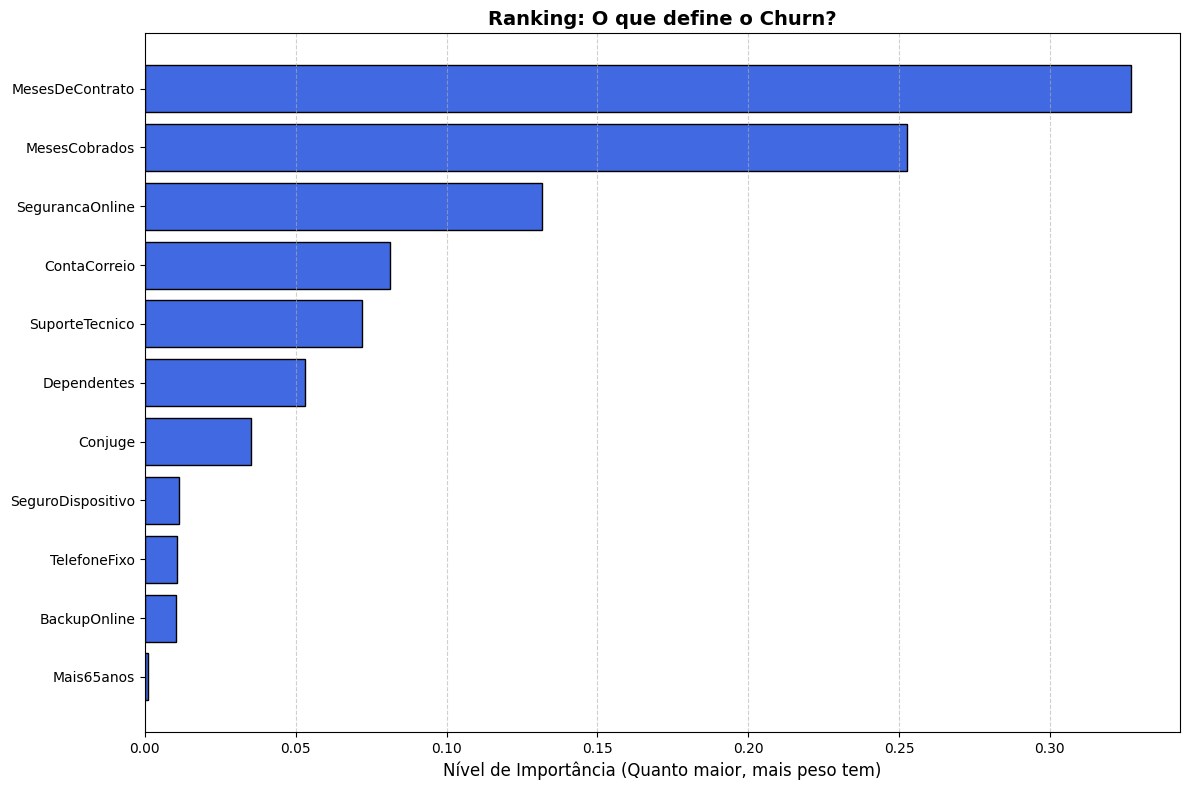

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Organizaçao dos dados (do menor para o maior para a escada ficar bonita)
dados = {
    'MesesDeContrato': 0.3268,
    'MesesCobrados': 0.2525,
    'SegurancaOnline': 0.1318,
    'ContaCorreio': 0.0811,
    'SuporteTecnico': 0.0720,
    'Dependentes': 0.0530,
    'Conjuge': 0.0351,
    'SeguroDispositivo': 0.0113,
    'TelefoneFixo': 0.0108,
    'BackupOnline': 0.0104,
    'Mais65anos': 0.0011
}

df_imp = pd.DataFrame(list(dados.items()), columns=['Feature', 'Importancia']).sort_values(by='Importancia')

# 2.  o gráfico com "espaço para respirar"
plt.figure(figsize=(12, 8)) # Aumentar a folha de desenho
plt.barh(df_imp['Feature'], df_imp['Importancia'], color='royalblue', edgecolor='black')

# 3. legendas
plt.xlabel('Nível de Importância (Quanto maior, mais peso tem)', fontsize=12)
plt.title('Ranking: O que define o Churn?', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6) # Linhas de fundo para guiar os olhos

plt.tight_layout() # O "Mágico" que desgruda as letras
plt.savefig('importancia_features_v2.png')
plt.show()

In [ ]:
plt.savefig('importancia_features.png', bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>

In [105]:
# Salva a imagem na pasta do Colab
plt.savefig('importancia_features_churn.png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>